## ANSL-analysis and plotting

Michael Ernst (M-earnest@github.com)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
import os
import glob
from __future__ import division #so 1/2 = 0.5, not 1/2=0

import plotly
import pandas as pd
import seaborn as sns

import librosa
import librosa.display

### ANSL data: cleaning/extraction: 
* at which point of volume and frequency stimuli was discovered
* presented in ascending or descending Volume condition
* order of stimuli presentation (1 or 2 (needs better encoding)

In [2]:


def extract_data(path):
    
    # necessary lists for data extraction
    conditions = []
    items = []
    volumes = []
    frequencies = []
    orders = []
    settings = [] 
    subjects = []
    
    for filename in glob.iglob(path): # all specified files in directory
        df = pd.read_csv(filename)

        for i in df.columns:
            for item in df[i]:
                
                # get subject info
                subject = filename.split('/')
                subject = subject[6]
                subject = subject[:5]
                subjects.append(subject)
                

                item= item.split('/')
                item= item[2]
                items.append(item)
                
                # get info on setting
                setting = filename.split('/')
                if 'baseline' in filename:
                    settings.append('baseline')
                elif 'epi_fast(TR1s)' in filename:
                    settings.append('epi_fast(TR1s)')
                elif 'epi_standard(TR2s)' in filename:
                    settings.append('epi_standard(TR2s)')
                else:
                    settings.append('structural(T1w)')


                if 'order1' in i:
                    orders.append('1')
                elif 'order2' in i: 
                    orders.append('2')

                if 'decrease' in i:
                    conditions.append('decrease')
                elif 'increase' in i:
                    conditions.append('increase')

                if '10dBFS' in item:
                    volumes.append(-10)
                elif '20dBFS' in item:
                    volumes.append(-20)
                elif '30dBFS' in item:
                    volumes.append(-30)
                elif '40dBFS' in item:
                    volumes.append(-40)
                elif '50dBFS' in item:
                    volumes.append(-50)
                elif '60dBFS' in item:
                    volumes.append(-60)
                elif '70dBFS' in item:
                    volumes.append(-70)
                elif '80dBFS' in item:
                    volumes.append(-80)
                elif '90dBFS' in item:
                    volumes.append(-90)
                elif '100dBFS' in item:
                    volumes.append(-100)
                elif 'not_discovered' in item:
                    # volume when discovered
                    volumes.append('0')
                
                if '150hz' in item:
                    frequencies.append(150)
                elif '250hz' in item:
                    frequencies.append(250)
                elif '500hz' in item:
                    frequencies.append(500)
                elif '1000hz' in item:
                    frequencies.append(1000)
                elif '1500hz' in item:
                    frequencies.append(1500)
                elif '2000hz' in item:
                    frequencies.append(2000)
                elif '2250hz' in item:
                    frequencies.append(2250)
                elif '2500hz' in item:
                    frequencies.append(2500)
                elif '2750hz' in item:
                    frequencies.append(2750)
                elif '3000hz' in item:
                    frequencies.append(3000)
                elif '4000hz' in item:
                    frequencies.append(4000)
                elif '6000hz' in item:
                    frequencies.append(6000)
                elif '8000hz' in item:
                    frequencies.append(8000)                    
    
# write dataframe
    dfx= pd.DataFrame({'subject': subjects,
                       'setting': settings,
                       'condition': conditions,
                       'order': orders,
                       'item' : items,
                       'dBFS' : volumes,
                       'frequency': frequencies})

    return dfx




dfx = extract_data('/home/michael/ANSL/scripts_stimulation/data/*_.csv')

display(dfx)
dfx.columns
dfx.to_csv('/home/michael/ANSL/data/ansl_data_plotting.csv', index=False)

,subject,setting,condition,order,item,dBFS,frequency
0,sub_1,epi_fast(TR1s),decrease,1,1000hz_minus_60dBFS.wav,-60,1000
1,sub_1,epi_fast(TR1s),decrease,1,1500hz_minus_60dBFS.wav,-60,500
2,sub_1,epi_fast(TR1s),decrease,1,2000hz_minus_90dBFS.wav,-90,2000
3,sub_1,epi_fast(TR1s),decrease,1,2250hz_minus_60dBFS.wav,-60,250
4,sub_1,epi_fast(TR1s),decrease,1,2500hz_minus_60dBFS.wav,-60,500
5,sub_1,epi_fast(TR1s),decrease,1,2750hz_minus_70dBFS.wav,-70,2750
6,sub_1,epi_fast(TR1s),decrease,1,3000hz_minus_70dBFS.wav,-70,3000
7,sub_1,epi_fast(TR1s),decrease,1,4000hz_minus_70dBFS.wav,-70,4000
8,sub_1,epi_fast(TR1s),decrease,1,6000hz_minus_80dBFS.wav,-80,6000
9,sub_1,epi_fast(TR1s),decrease,1,8000hz_minus_60dBFS.wav,-60,8000


In [3]:
# get statistics of aquired data
stats = dfx.groupby('frequency')['dBFS'].describe().unstack()
stats = pd.Series.to_frame(stats)
stats = stats.unstack()
stats = stats[0]

# relevant stats for 150 hz
display(stats[150])
# count of 150hz
display(stats[150].iloc[0])

#count = stats.iloc[0]
#count = pd.Series.to_frame(count)
#count_1500hz = count.iloc[1]
#count_1500hz = pd.Series.to_frame(count_1500hz)
#display(count_1500hz)

count    16.000000
mean    -55.000000
std      22.803509
min     -90.000000
25%     -67.500000
50%     -45.000000
75%     -40.000000
max     -20.000000
Name: 150, dtype: float64

16.0

In [4]:
# better overview
subject = 'sub-test'
display(dfx['dBFS'].mean())
#https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
dfx_dBFS = dfx.groupby(['subject','setting','condition','order','frequency']).aggregate('mean')
#dfx_frequency = dfx.groupby(['subject','condition','order','dBFS']).aggregate('mean')


dfx_dBFS = dfx_dBFS.unstack()
dfx_dBFS = dfx_dBFS['dBFS']
dfx.to_csv('/home/michael/ANSL/data/ansl_dataset.csv', index=False)


display(dfx_dBFS.columns)
dfx_dBFS

-74.375

Int64Index([150, 250, 500, 1000, 2000, 2750, 3000, 4000, 6000, 8000], dtype='int64', name='frequency')

frequency                                   150   250        500   1000  2000  \
subject setting            condition order                                      
sub_1   baseline           decrease  1     -90.0 -55.0 -90.000000 -90.0 -90.0   
                                     2     -90.0 -90.0 -63.333333 -90.0 -90.0   
                           increase  1     -90.0 -85.0 -86.666667 -90.0 -90.0   
                                     2     -90.0 -85.0 -86.666667 -90.0 -90.0   
        epi_fast(TR1s)     decrease  1     -40.0 -55.0 -63.333333 -60.0 -90.0   
                                     2     -40.0 -60.0 -70.000000 -60.0 -60.0   
                           increase  1     -40.0 -70.0 -66.666667 -40.0 -90.0   
                                     2     -20.0 -55.0 -63.333333 -60.0 -60.0   
        epi_standard(TR2s) decrease  1     -50.0 -65.0 -76.666667 -70.0 -70.0   
                                     2     -40.0 -60.0 -80.000000 -60.0 -70.0   
                           increase  1     -40.0 -60.0 -86.666667 -90.0 -80.0   
                                     2     -40.0 -60.0 -70.000000 -50.0 -80.0   
        structural(T1w)    decrease  1     -60.0 -75.0 -83.333333 -90.0 -90.0   
                                     2     -60.0 -80.0 -90.000000 -20.0 -90.0   
                           increase  1     -40.0 -65.0 -66.666667 -80.0 -80.0   
                                     2     -50.0 -55.0 -70.000000 -80.0 -80.0   

frequency                                   2750  3000  4000  6000  8000  
subject setting            condition order                                
sub_1   baseline           decrease  1     -80.0 -90.0 -90.0 -90.0 -80.0  
                                     2     -80.0 -90.0 -80.0 -80.0 -80.0  
                           increase  1     -90.0 -90.0 -90.0 -80.0 -90.0  
                                     2     -90.0 -90.0 -90.0 -80.0 -90.0  
        epi_fast(TR1s)     decrease  1     -70.0 -70.0 -70.0 -80.0 -60.0  
                                     2     -70.0 -90.0 -70.0 -80.0 -70.0  
                           increase  1     -70.0 -80.0 -70.0 -80.0 -80.0  
                                     2     -70.0 -70.0 -70.0 -80.0 -80.0  
        epi_standard(TR2s) decrease  1     -80.0 -80.0 -80.0 -80.0 -70.0  
                                     2     -80.0 -90.0 -70.0 -70.0 -60.0  
                           increase  1     -80.0 -90.0 -80.0 -80.0 -80.0  
                                     2     -80.0 -80.0 -80.0 -80.0 -80.0  
        structural(T1w)    decrease  1     -80.0 -90.0 -80.0 -80.0 -70.0  
                                     2     -80.0 -90.0 -80.0 -80.0 -80.0  
                           increase  1     -80.0 -80.0 -80.0 -80.0 -80.0  
                                     2     -80.0 -80.0 -80.0 -80.0 -80.0

#### _if you want to split your dataframe by some condition use the [groupby function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)_

In [5]:
# how to use groupby
grouped = dfx.groupby('condition')

for name, group in grouped:
   # print(name)
    #print(group)
    if name == 'increase':
        df1 = pd.DataFrame(group)
    else:
        df2 = pd.DataFrame(group)


#### get basic values (means, sd, etc.) 

In [6]:
stats = dfx.groupby('frequency')['dBFS'].describe().unstack()

stats = pd.Series.to_frame(stats)
stats = stats.unstack()
stats = stats[0]

freqs = []
counts = []
means = []
sds = []
mins_ = []
maxs_ = []
medians = []
per25s = []
per75s = []

for item in stats:
    freq = item
    count = stats[item].iloc[0]
    mean = stats[item].iloc[1]
    sd = stats[item].iloc[2]
    min_ = stats[item].iloc[3]
    max_ = stats[item].iloc[4]
    per25 = stats[item].iloc[5]
    median = stats[item].iloc[6]
    per75 = stats[item].iloc[7]   
    freqs.append(item)
    means.append(mean)
    counts.append(count)
    sds.append(sd)
    mins_.append(min_)
    maxs_.append(max_)
    medians.append(median)
    per25s.append(per25)
    per75s.append(per75)


df_mean= pd.DataFrame({'frequency': freqs, 'mean_dBFS': means,
                       'standard_deviation': sds, 'min': mins_,
                       'max': maxs_, 'median': medians, 
                       '25%': per25s, '75%': per75s})

df_mean.to_csv('/home/michael/ANSL/data/ansl_stats.csv', index=False)

display(df_mean)


,frequency,mean_dBFS,standard_deviation,min,max,median,25%,75%
0,150,-55.000000,22.803509,-90.0,-67.5,-40.0,-45.0,-20.0
1,250,-67.187500,16.893285,-90.0,-80.0,-57.5,-70.0,-20.0
2,500,-75.833333,14.707551,-90.0,-90.0,-67.5,-80.0,-20.0
3,1000,-70.000000,21.291626,-90.0,-90.0,-60.0,-75.0,-20.0
4,2000,-81.250000,10.878113,-90.0,-90.0,-77.5,-85.0,-60.0
5,2750,-78.750000,6.191392,-90.0,-80.0,-77.5,-80.0,-70.0
6,3000,-84.375000,7.274384,-90.0,-90.0,-80.0,-90.0,-70.0
7,4000,-78.750000,7.187953,-90.0,-80.0,-70.0,-80.0,-70.0
8,6000,-80.000000,3.651484,-90.0,-80.0,-80.0,-80.0,-70.0
9,8000,-76.875000,8.732125,-90.0,-80.0,-70.0,-80.0,-60.0


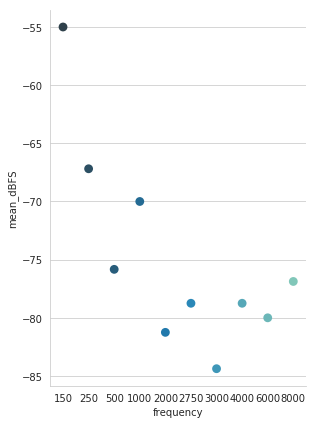

In [17]:
sns.set_style('whitegrid')
sns.catplot(data=df_mean,y = 'mean_dBFS', x = 'frequency',
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point")


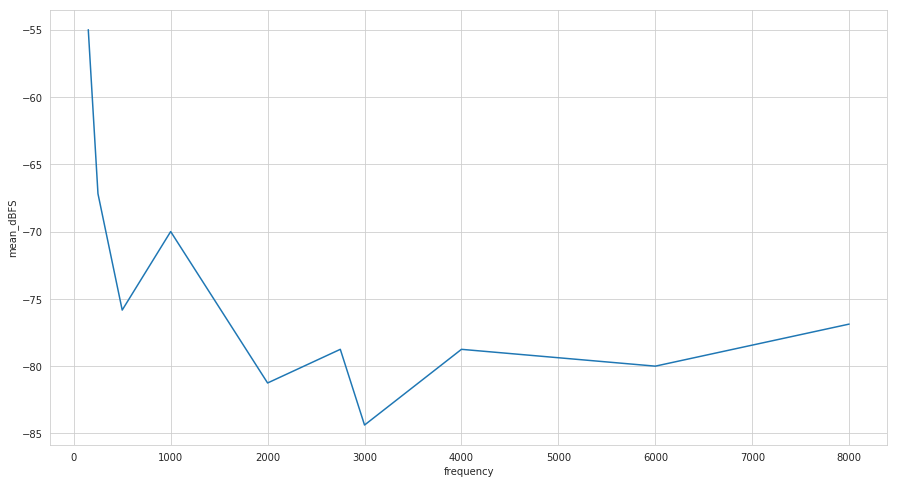

In [18]:
plt.figure(figsize=(15,8))
#sns.barplot(y = dfx['dBFS'], x = dfx['frequency'])
sns.despine()
helix = sns.dark_palette("purple")
husl1 = sns.light_palette((210, 90, 60), input="husl")
sns.lineplot(x = df_mean['frequency'], y = df_mean['mean_dBFS'], palette="BuGn", alpha = 1)
#sns.swarmplot(y = dfx['dBFS'], x = dfx['frequency'], palette=helix)

### ANSL data:  Plots 

#### _overall_

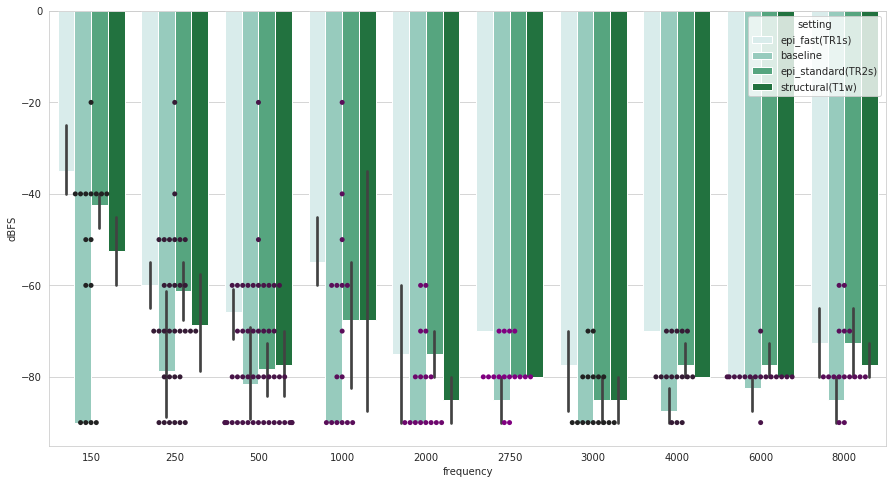

In [19]:
plt.figure(figsize=(15,8))
#sns.barplot(y = dfx['dBFS'], x = dfx['frequency'])
helix = sns.dark_palette("purple")
husl1 = sns.light_palette((210, 90, 60), input="husl")
sns.barplot(y = dfx['dBFS'], x = dfx['frequency'],hue = dfx['setting'], palette="BuGn")
sns.swarmplot(y = dfx['dBFS'], x = dfx['frequency'], palette=helix)


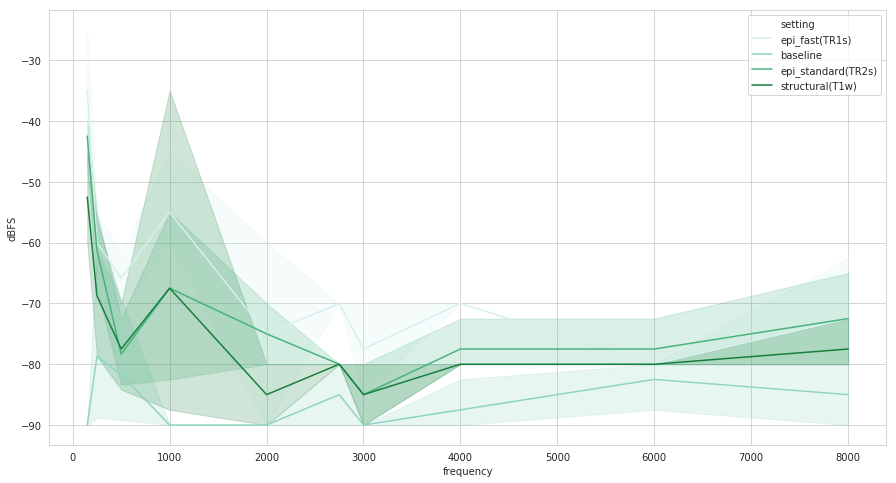

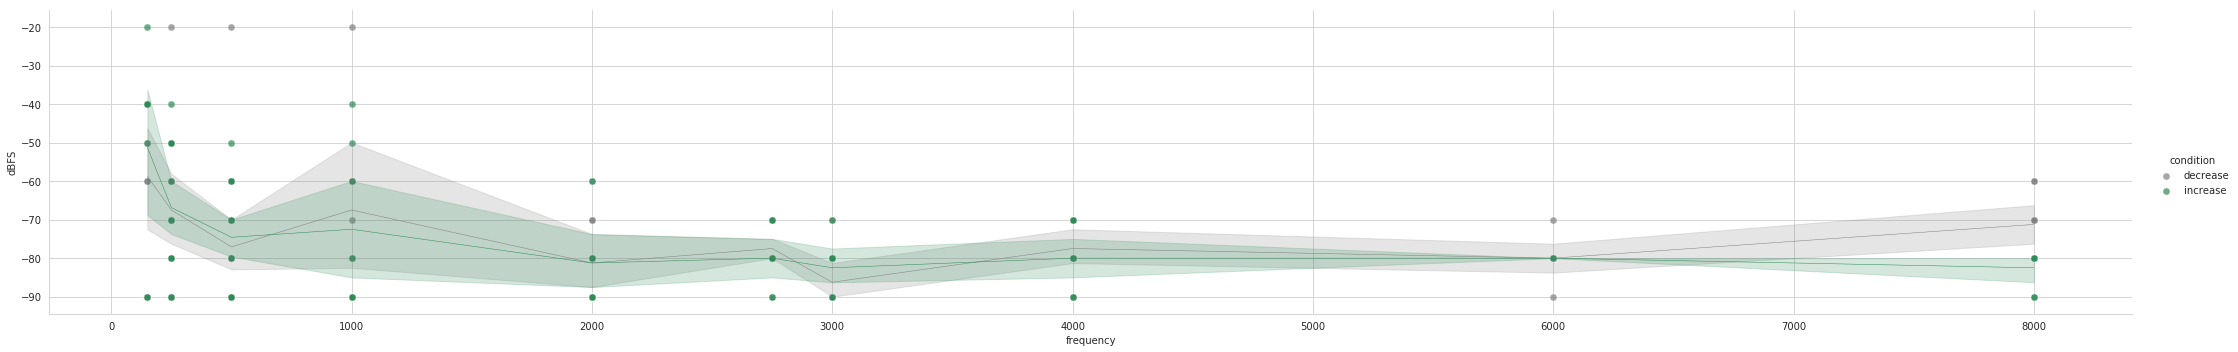

In [20]:
plt.figure(figsize=(15,8))
#sns.barplot(y = dfx['dBFS'], x = dfx['frequency'])
sns.despine()
helix = sns.dark_palette("purple")
husl1 = sns.light_palette((210, 90, 60), input="husl")
sns.lineplot(y = dfx['dBFS'], x = dfx['frequency'],hue = dfx['setting'], palette="BuGn", alpha = 1)
#sns.swarmplot(y = dfx['dBFS'], x = dfx['frequency'], palette=helix)

pal = dict(increase="seagreen", decrease="gray")
g = sns.FacetGrid(dfx, hue="condition", palette=pal, height=5, aspect=6)
g.map(plt.scatter, "frequency", "dBFS", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.map(sns.lineplot, "frequency", "dBFS", alpha=1, linewidth=.5,palette='BuGn')
g.add_legend();


/home/michael/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



<Figure size 2160x720 with 0 Axes>

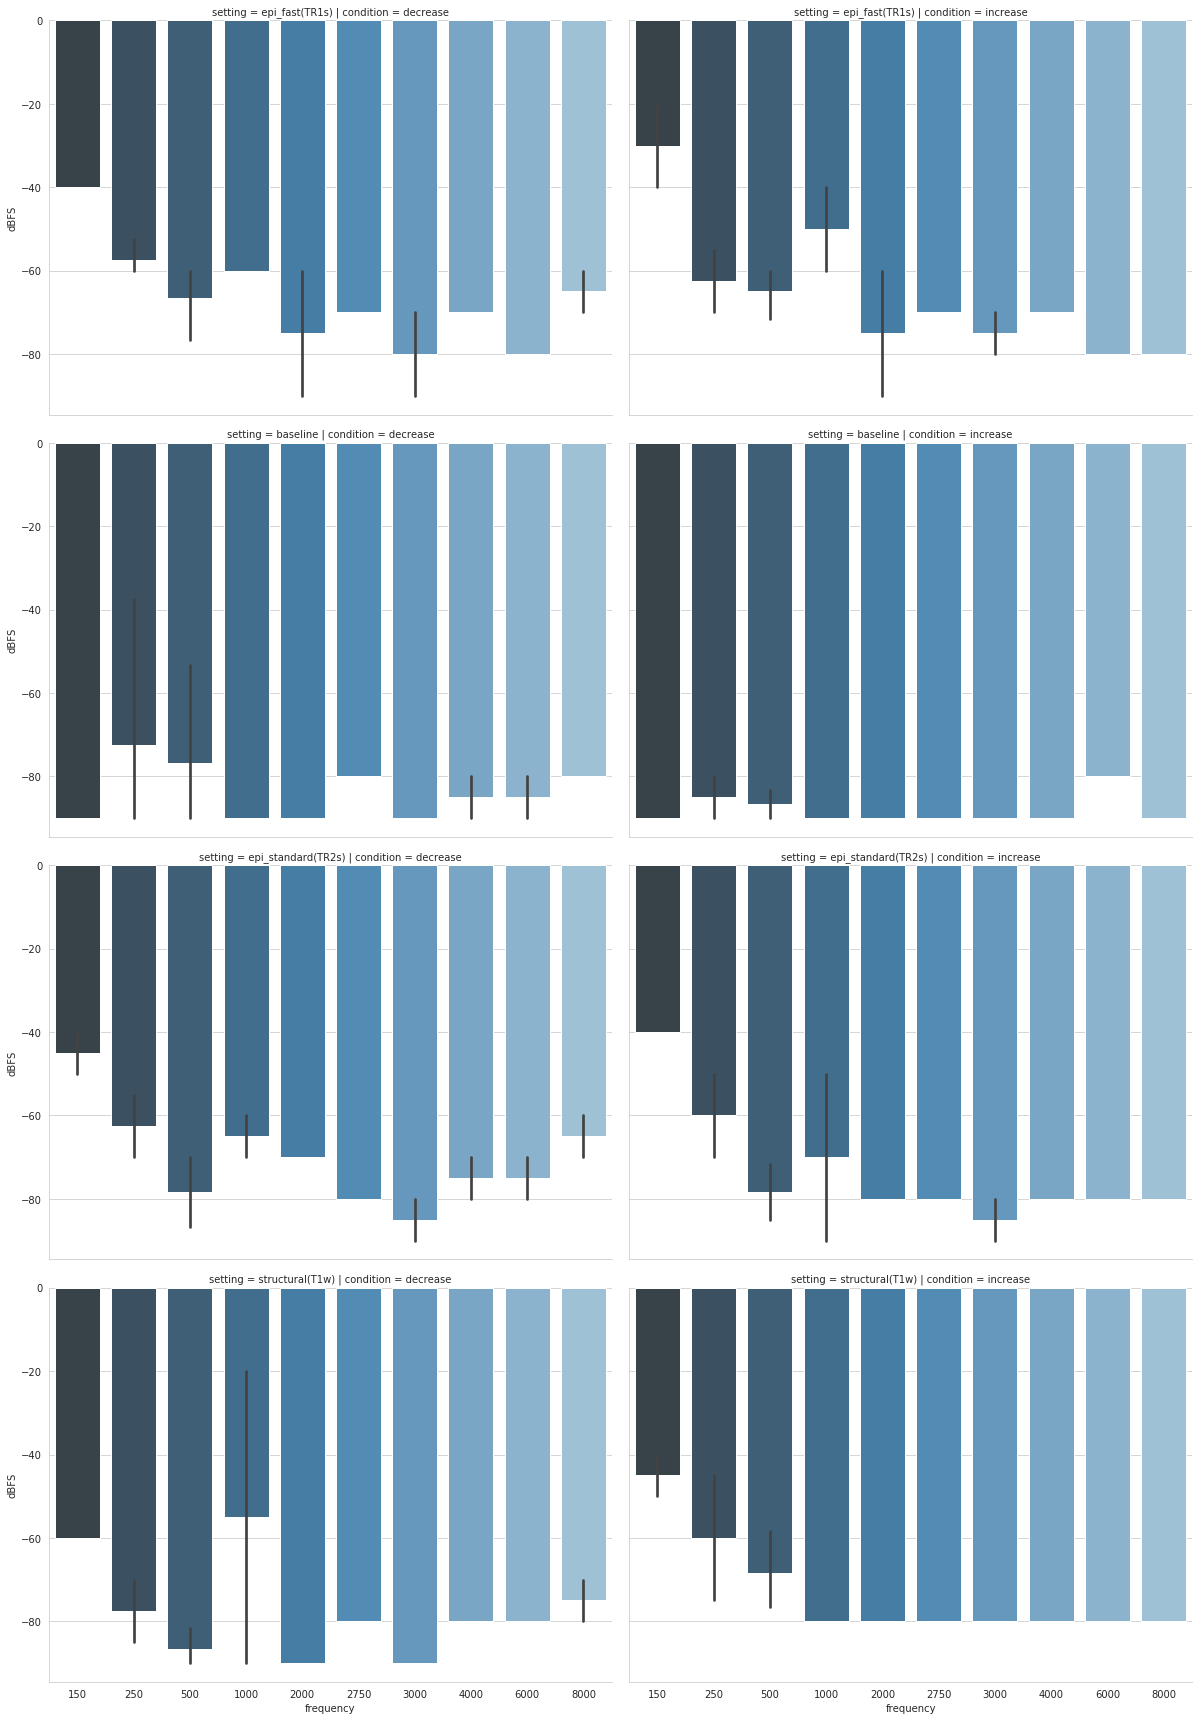

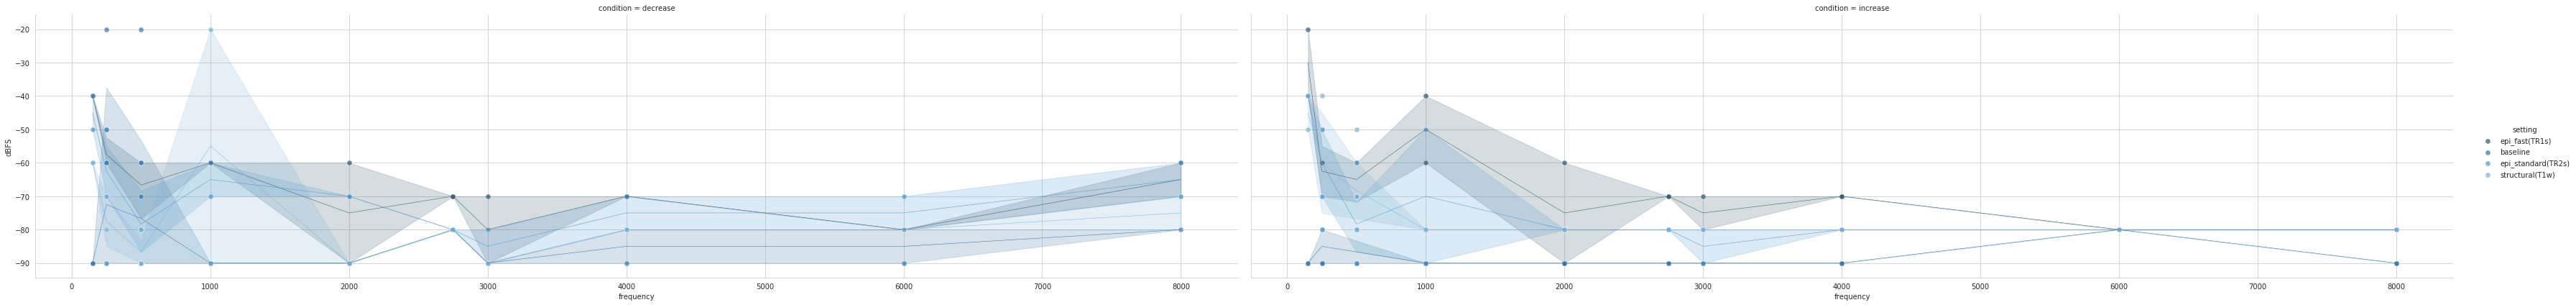

In [21]:
plt.figure(figsize=(30,10))
g = sns.FacetGrid(dfx, col="condition", row="setting", height=6, aspect=1.4)
g.map(sns.barplot, "frequency", "dBFS",palette="Blues_d");

g = sns.FacetGrid(dfx, col="condition",  hue="setting", height=6, aspect=4,palette="Blues_d")
g.map(sns.lineplot, "frequency", "dBFS", alpha=1, linewidth=.5)
g.map(plt.scatter, "frequency", "dBFS", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()

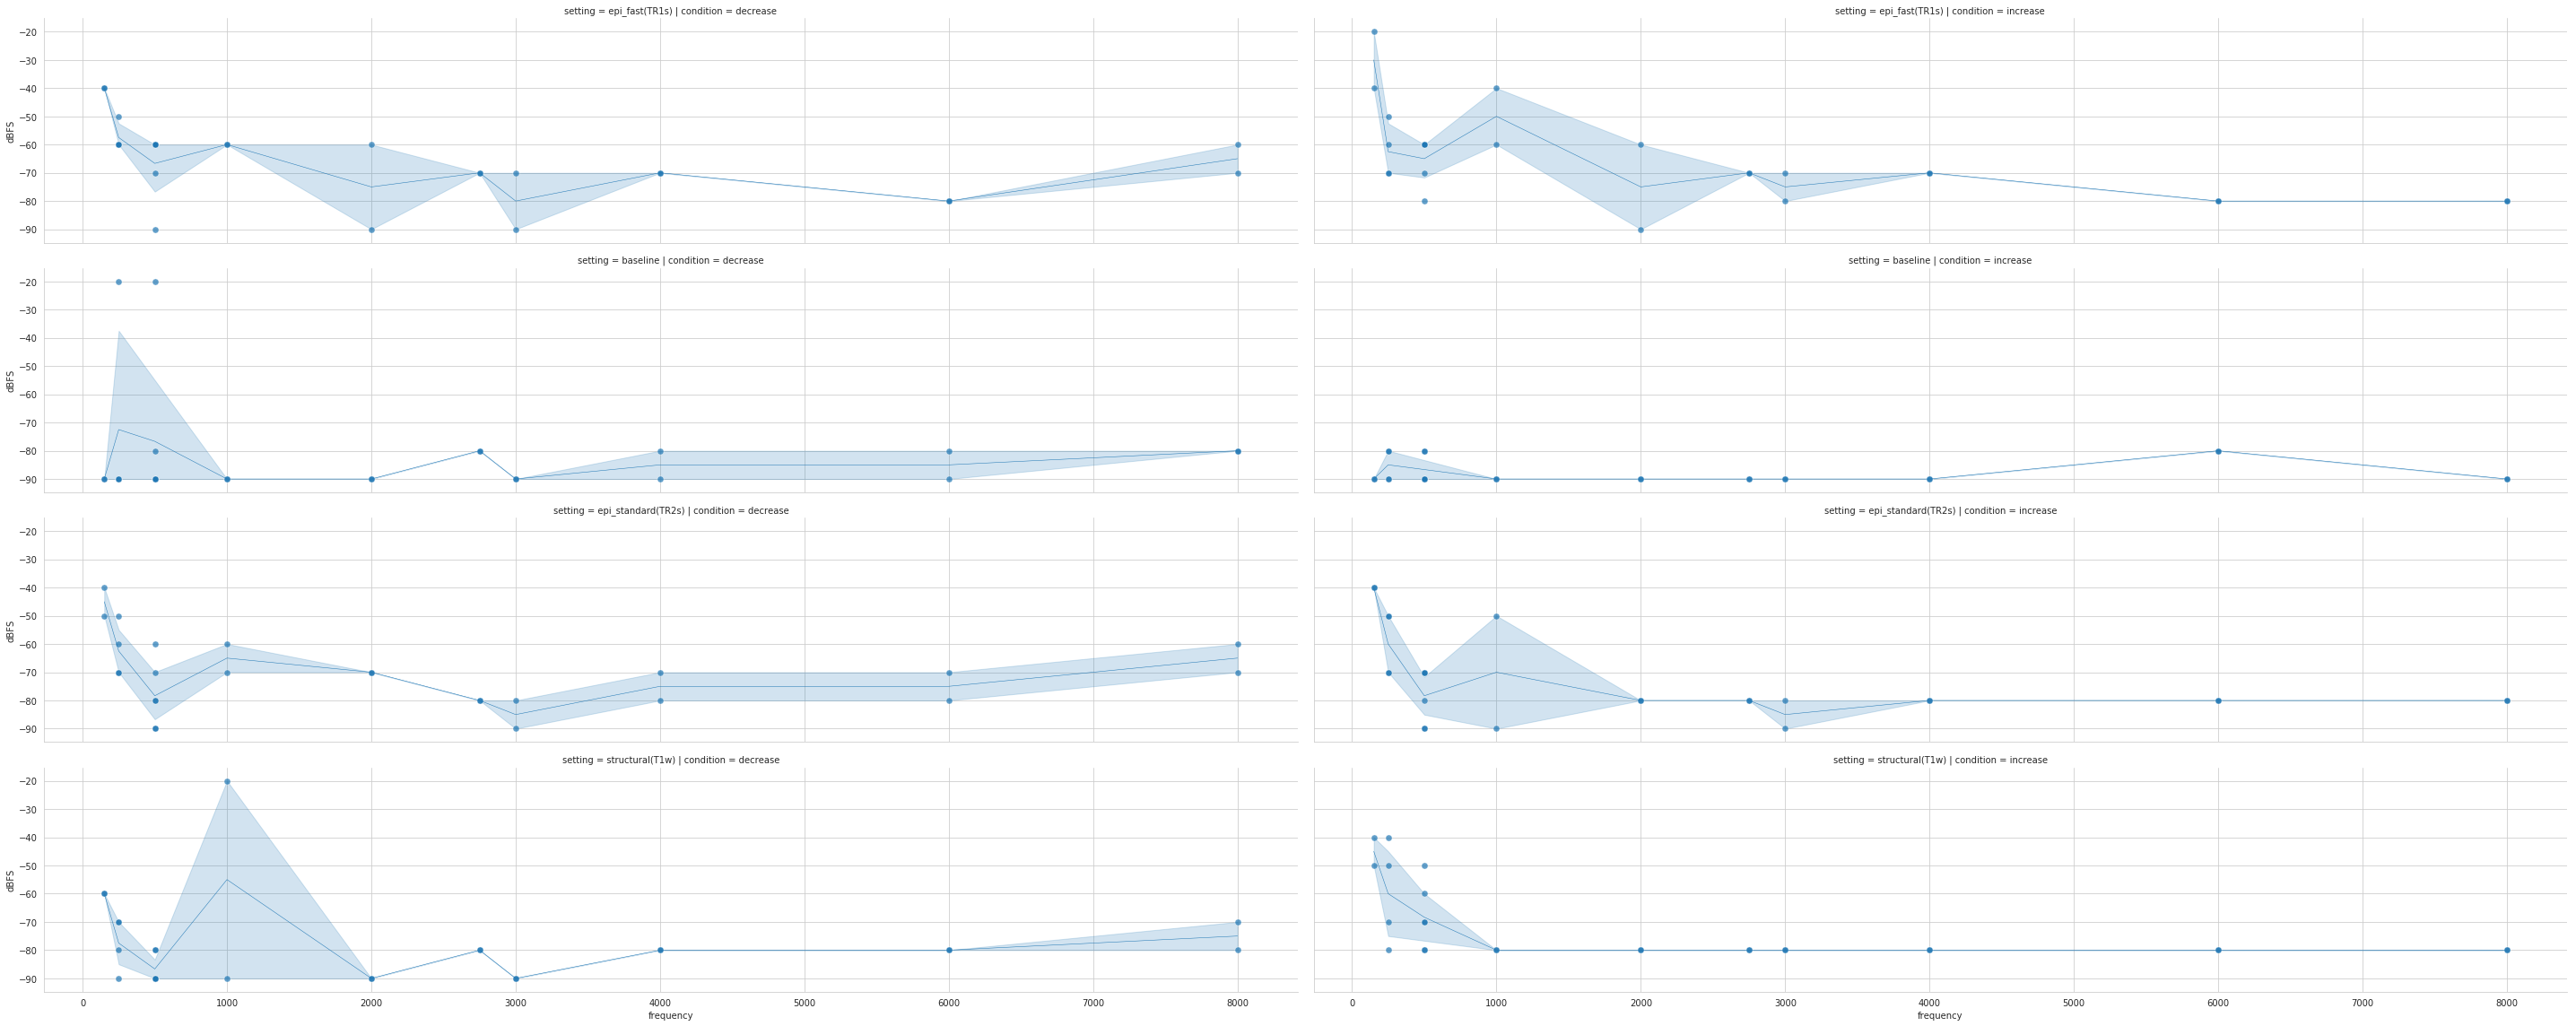

In [82]:
g = sns.FacetGrid(dfx, col="condition", row="setting",height=4, aspect=5)
g.map(sns.lineplot, "frequency", "dBFS", alpha=1, linewidth=.5,palette="Blues_d")
g.map(plt.scatter, "frequency", "dBFS", s=50, alpha=.7, linewidth=.5, edgecolor="white")

#### _by condition: increasing/decreasing_

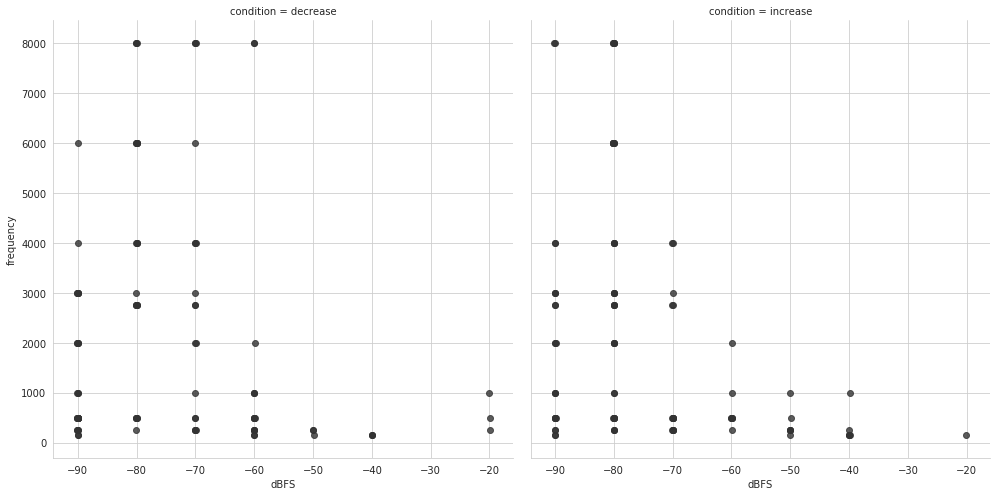

In [22]:
g = sns.FacetGrid(dfx, col="condition", margin_titles=True, height=7, aspect=1)
g.map(sns.regplot, "dBFS", "frequency", color=('0.2'), fit_reg=False, x_jitter=.1);

Text(0.5,1,'decreasing ')

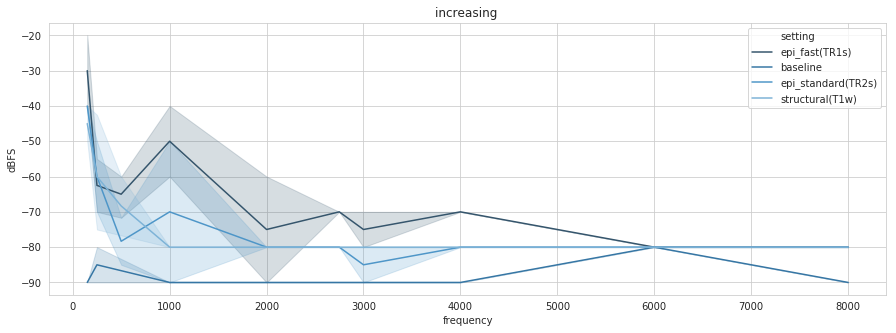

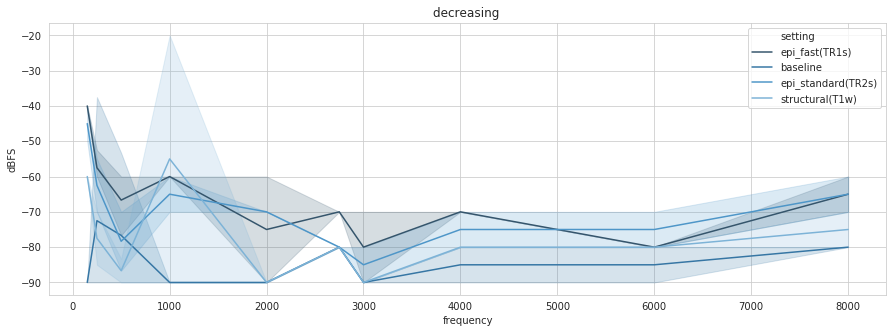

In [23]:
plt.figure(figsize=(15,5))
sns.despine()
sns.lineplot(data=df1,y = df1['dBFS'], x = df1['frequency'],hue = df1['setting'], palette='Blues_d', alpha = 1)
plt.title('increasing ')

plt.figure(figsize=(15,5))
sns.despine()
sns.lineplot(data=df2,y = df2['dBFS'], x = df2['frequency'],hue = df2['setting'], palette="Blues_d", alpha = 1)
plt.title('decreasing ')

##### _by mri-settings_

baseline
epi_fast(TR1s)
epi_standard(TR2s)
structural(T1w)


Text(0.5,1,'T1w')

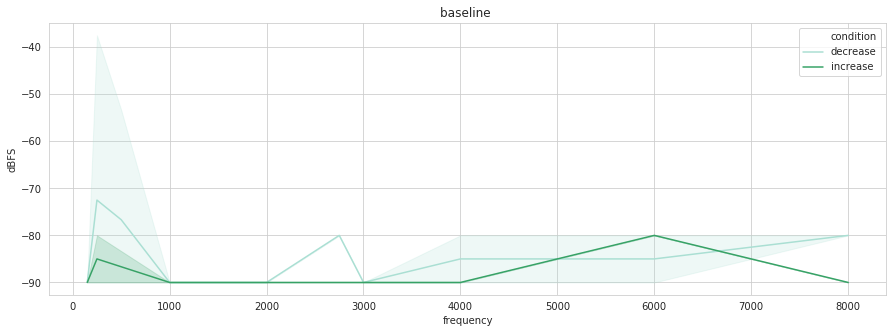

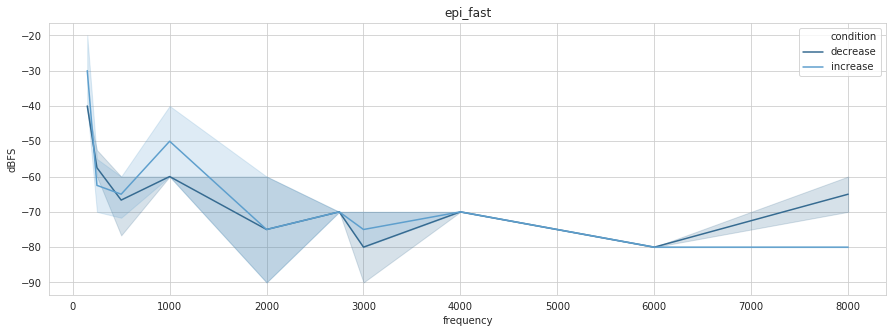

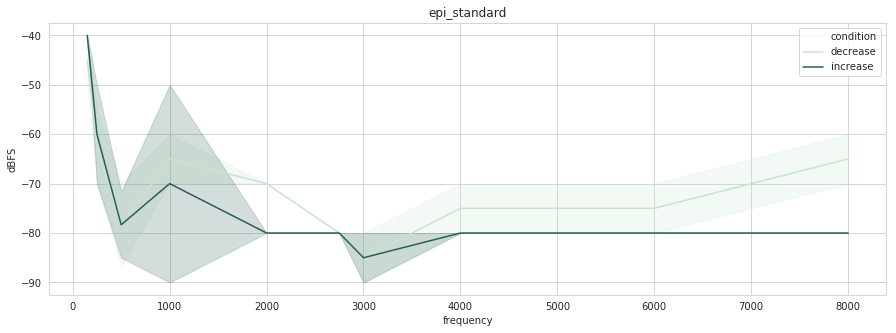

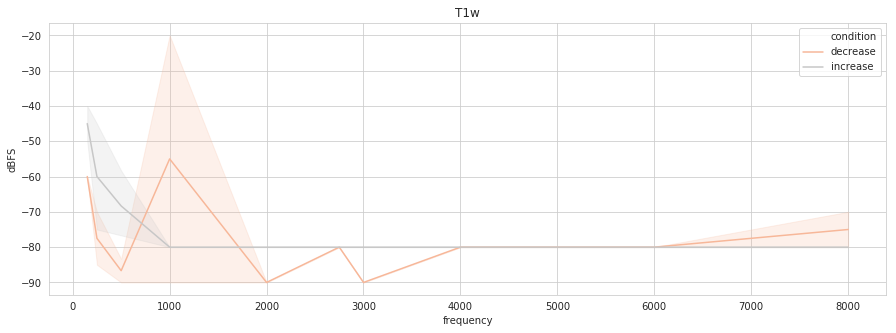

In [24]:
grouped = dfx.groupby('setting')

for name, group in grouped:
    print(name)
    #print(group)
    if 'baseline'in name:
        df_base = pd.DataFrame(group)
    elif 'epi_fast' in name:
        df_tr1 = pd.DataFrame(group)
    elif 'epi_standard'in name:
        df_tr2 = pd.DataFrame(group)
    elif 'T1w' in name:
        df_t1w = pd.DataFrame(group)

# baseline
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
sns.despine()
sns.lineplot(data=df_base,y = df_base['dBFS'], x = df_base['frequency'],hue = df_base['condition']
             , palette="BuGn", alpha = 1)
plt.title('baseline ')

# epi fast
plt.figure(figsize=(15,5))
sns.despine()
sns.lineplot(data=df_tr1,y = df_tr1['dBFS'], x = df_tr1['frequency'],hue = df_tr1['condition'],
             palette="Blues_d", alpha = 1)
plt.title('epi_fast')

# epi standard
plt.figure(figsize=(15,5))
sns.despine()
sns.lineplot(data=df_tr2,y = df_tr2['dBFS'], x = df_tr2['frequency'],hue = df_tr2['condition'],
             palette=("ch:2.5,-.2,dark=.3"), alpha = 1)
plt.title('epi_standard')

# T1
plt.figure(figsize=(15,5))
sns.despine()
sns.lineplot(data=df_t1w,y = df_t1w['dBFS'], x = df_t1w['frequency'],hue = df_t1w['condition'],
             palette=("RdGy"), alpha = 1)
plt.title('T1w')




##### _including scatterplot_

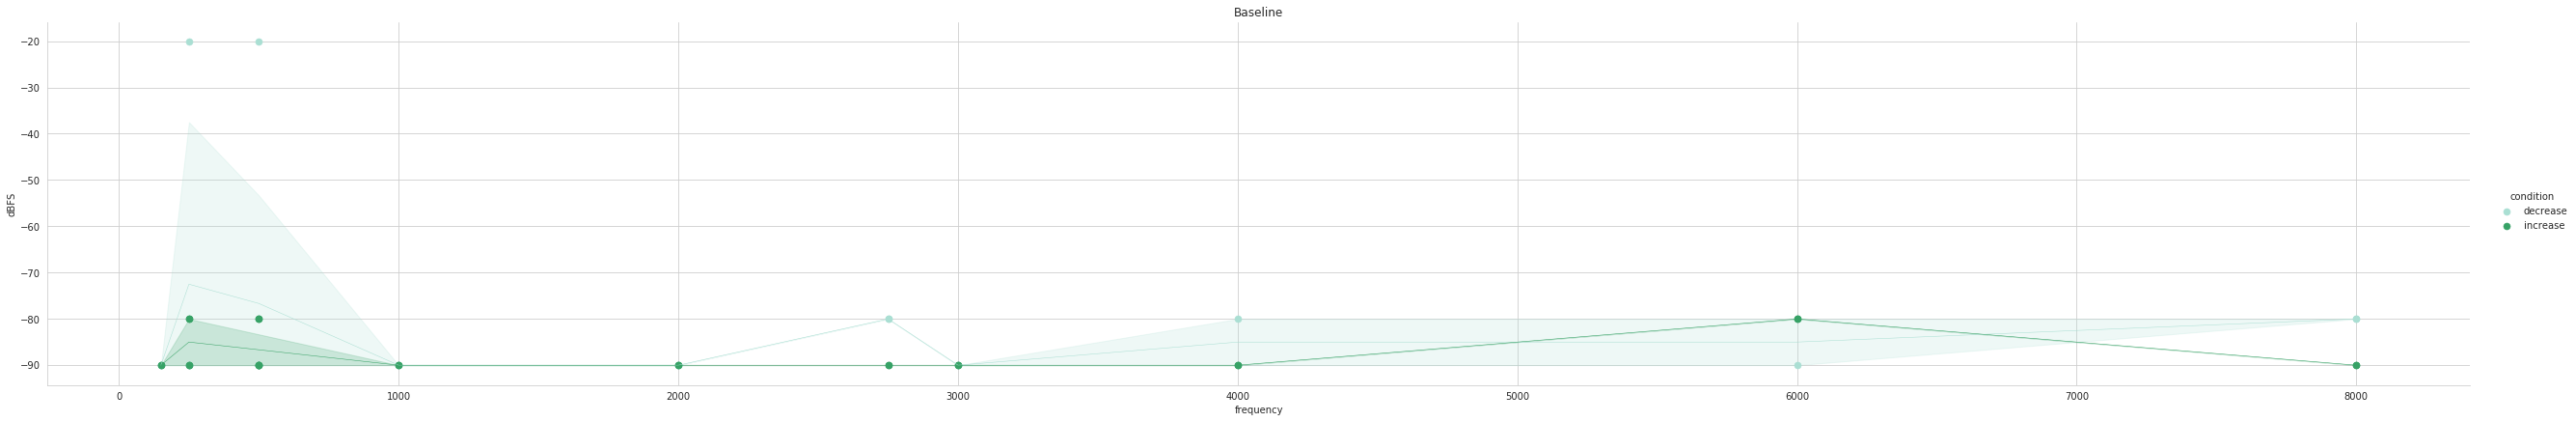

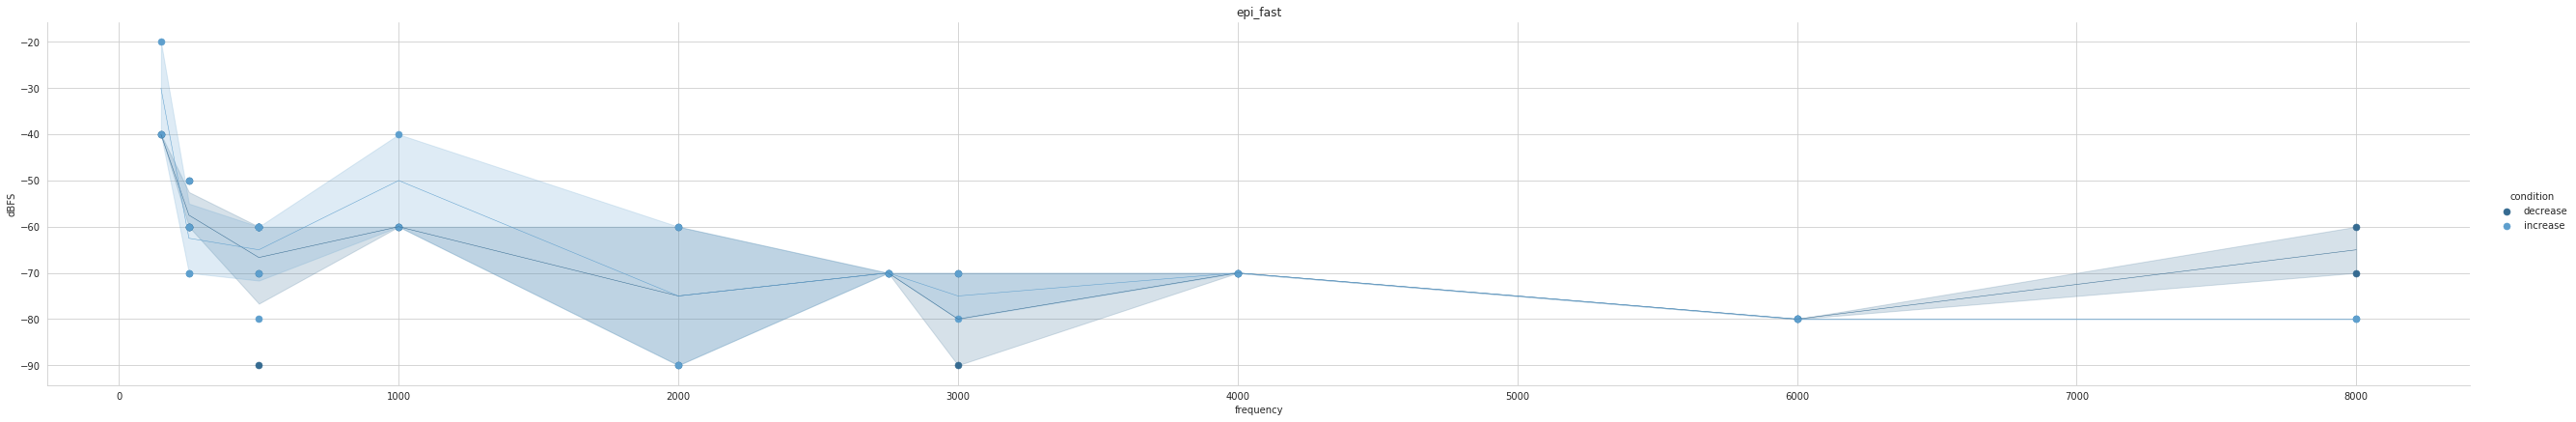

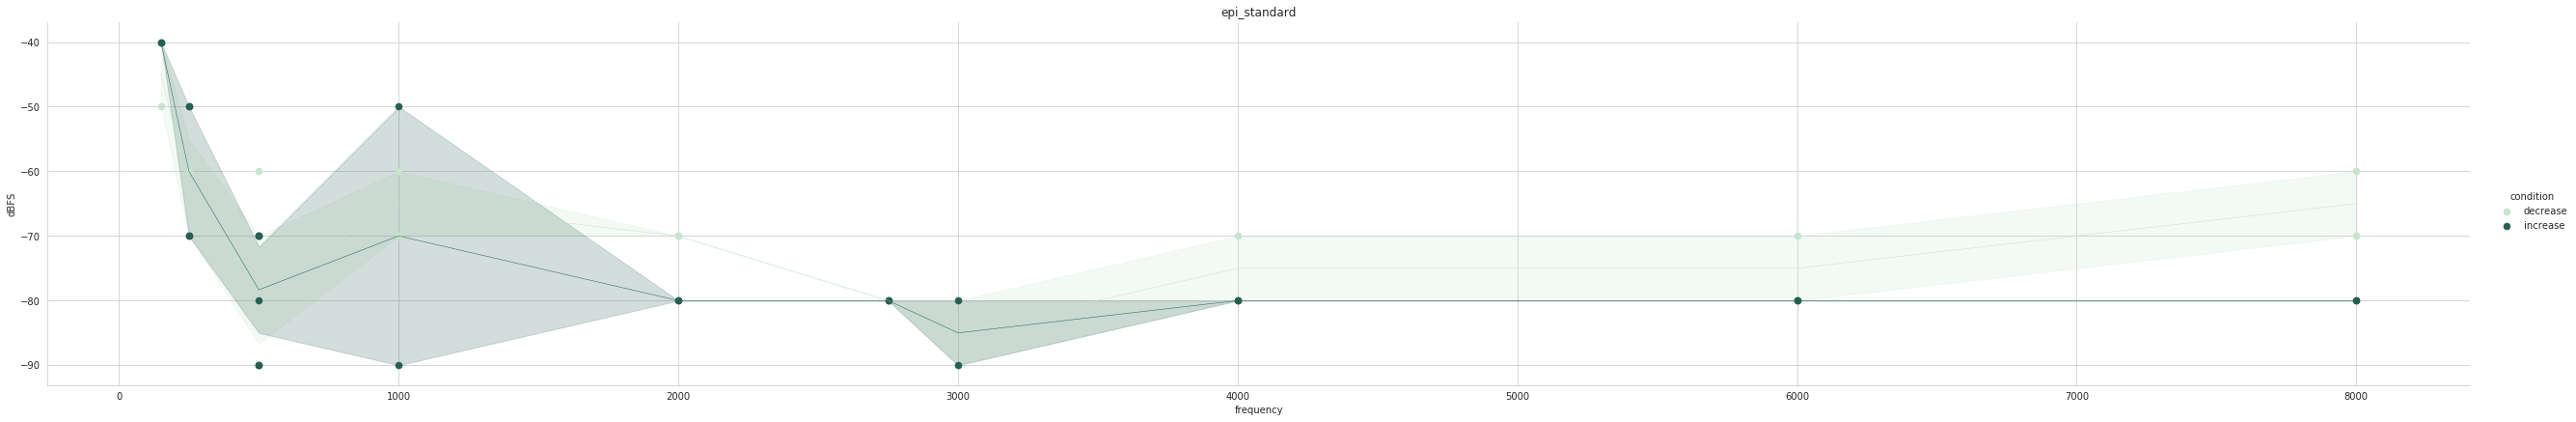

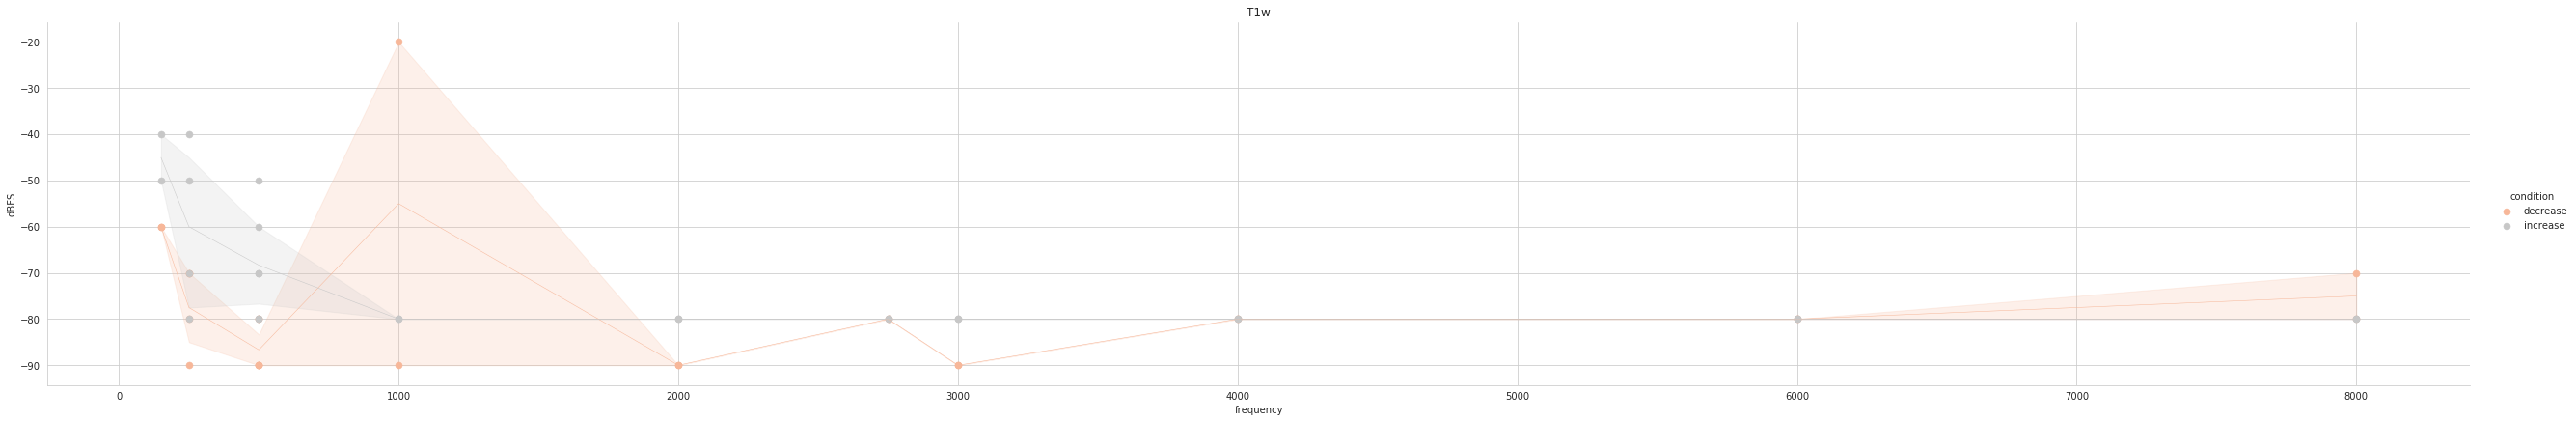

In [25]:
# or with markers
g = sns.FacetGrid(df_base,hue='condition', height=6, aspect=6,palette='BuGn')
g.map(sns.lineplot, "frequency", "dBFS", alpha=1, linewidth=.5)
g.map(plt.scatter, "frequency", "dBFS", s=50, alpha=1, linewidth=.5)
plt.title('Baseline')
g.add_legend()
sns.despine()


g = sns.FacetGrid(df_tr1,hue='condition', height=6, aspect=6,palette='Blues_d')
g.map(sns.lineplot, "frequency", "dBFS", alpha=1, linewidth=.5)
g.map(plt.scatter, "frequency", "dBFS", s=50, alpha=1, linewidth=.5)
plt.title('epi_fast')
g.add_legend()
sns.despine()

g = sns.FacetGrid(df_tr2,hue='condition', height=6, aspect=6,palette=("ch:2.5,-.2,dark=.3"))
g.map(sns.lineplot, "frequency", "dBFS", alpha=1, linewidth=.5)
g.map(plt.scatter, "frequency", "dBFS", s=50, alpha=1, linewidth=.5)
plt.title('epi_standard')
g.add_legend()
sns.despine()



g = sns.FacetGrid(df_t1w,hue='condition', height=6, aspect=6,palette='RdGy')
g.map(sns.lineplot, "frequency", "dBFS", alpha=1, linewidth=.5)
g.map(plt.scatter, "frequency", "dBFS", s=50, alpha=1, linewidth=.5)
plt.title('T1w')
g.add_legend()
sns.despine()

### Plotting: function displaying spectrogram/common frequencies in stimuli material overlayed with results of ansl
* path to audiofilse/stimuli as input
    * loop over all files in directory and [extract features](https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html) ->  to spectogram
		- example: music feature N2CU(mirjam) - mfs_spectrum_log_norm -> in liste mit frequenzen
		 - mean-frequency over time in df
		  - create density plot showing distribution/concentration of frequencies
          - overlay ansl results/result as line plot/density plot

### Plotting: displaying common mri-frequencies overlayed with results of ansl
(* TODO: intern Mikrofon an Kopfspule im Mrt?: Aufzeichnung von Frequenzbändern des MRT als wav o.Ä 
		-> sollte mrt-noise canceln -> möglichkeit der Aufnahme der mrt frequenzen
			-> welches output-format)
* **_(highly recommended that you aquire data for your specific mri)_**
* extracting frequencies uesd in different settings (aquired via mri-compatible microphone) as shown above
    -> create densitiy plot of mri and overlay ansl result/results

#### _Let's first take a look at our audio file_

Audio length: 9.30 seconds


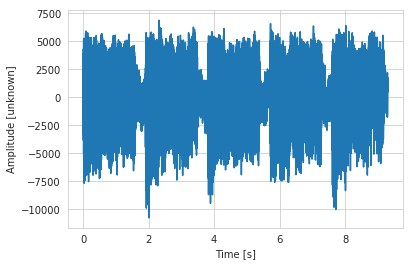

In [26]:
#source: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
from scipy.io import wavfile

rate, audio = wavfile.read('/home/michael/ANSL/t1_5tr.wav') # exchange string for your file
audio = np.mean(audio, axis=1)

N = audio.shape[0]
L = N / rate

print(f'Audio length: {L:.2f} seconds')

f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, audio)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Amplitude [unknown]');

#### _as a spectogram_ using [librosa](https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html)

In [27]:
y, sr = librosa.load('/home/michael/ANSL/t1_5tr.wav')
librosa.feature.melspectrogram(y=y, sr=sr)

array([[7.53980739e-01, 1.10364087e+00, 2.42058355e+00, ...,
        5.48429637e+00, 9.32906870e-01, 3.91300491e-01],
       [5.43385348e-01, 3.22812335e-01, 2.37279932e-01, ...,
        8.42717780e-01, 1.03714986e+00, 2.29353435e+00],
       [2.07008093e-01, 1.65957287e-01, 4.51420219e-01, ...,
        4.89581064e-01, 6.18854774e-01, 4.58194849e+00],
       ...,
       [2.14549347e-03, 1.61028400e-03, 1.47391463e-03, ...,
        1.80830181e-03, 2.07101276e-03, 1.38556079e-03],
       [9.10719166e-04, 5.36894685e-04, 3.07911876e-04, ...,
        5.76240412e-04, 4.89022182e-04, 5.22329056e-04],
       [1.64069841e-04, 6.30849744e-05, 3.17793485e-05, ...,
        4.83463509e-05, 4.24640542e-05, 4.16624760e-05]])

In [28]:
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

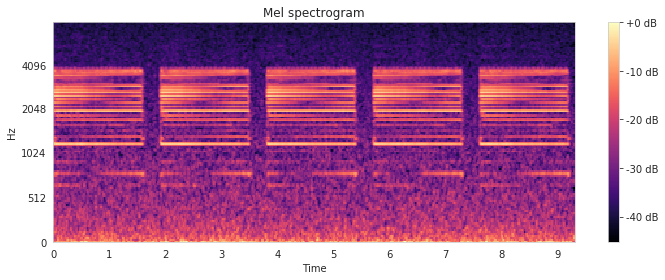

In [29]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max),
                         y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

### or using the scipy and numpy libraries to perform a [fast fourier transformation](https://en.wikipedia.org/wiki/Fast_Fourier_transform)
* [source](http://myinspirationinformation.com/uncategorized/audio-signals-in-python/)

In [30]:
from scipy.io import wavfile

rate, audio = wavfile.read('/home/michael/ANSL/t1_5tr.wav')
audio = np.mean(audio, axis=1)

/home/michael/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning:

Casting complex values to real discards the imaginary part



Text(0,0.5,'Amplitude')

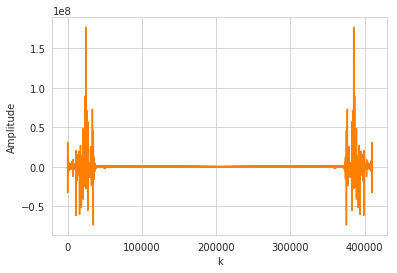

In [31]:
from numpy import fft as fft

fourier=fft.fft(audio)

plt.plot(fourier, color='#ff7f00')
plt.xlabel('k')
plt.ylabel('Amplitude')

In [32]:
n = len(audio)
fourier = fourier[0:(n//2)]

# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)

/home/michael/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning:

Casting complex values to real discards the imaginary part



(0, 10)

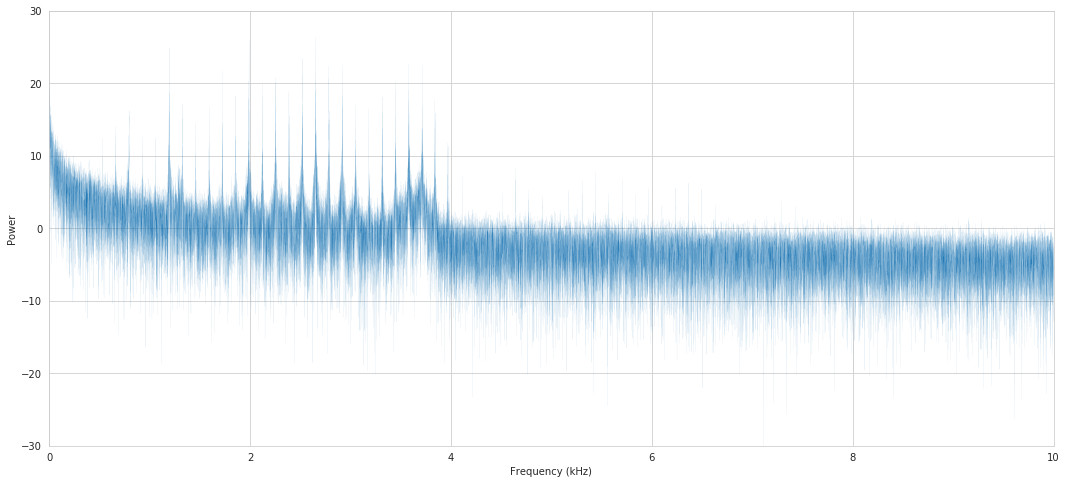

In [34]:
#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (rate*1.0/n);
plt.figure(figsize=(18,8))
plt.plot(freqArray/1000, 10*np.log10(fourier), linewidth=0.04)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power')
plt.ylim(-30, 30)
plt.xlim(0, 10)

#### _as a [kde plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)_

/home/michael/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:657: ComplexWarning:

Casting complex values to real discards the imaginary part



Text(0,0.5,'Power')

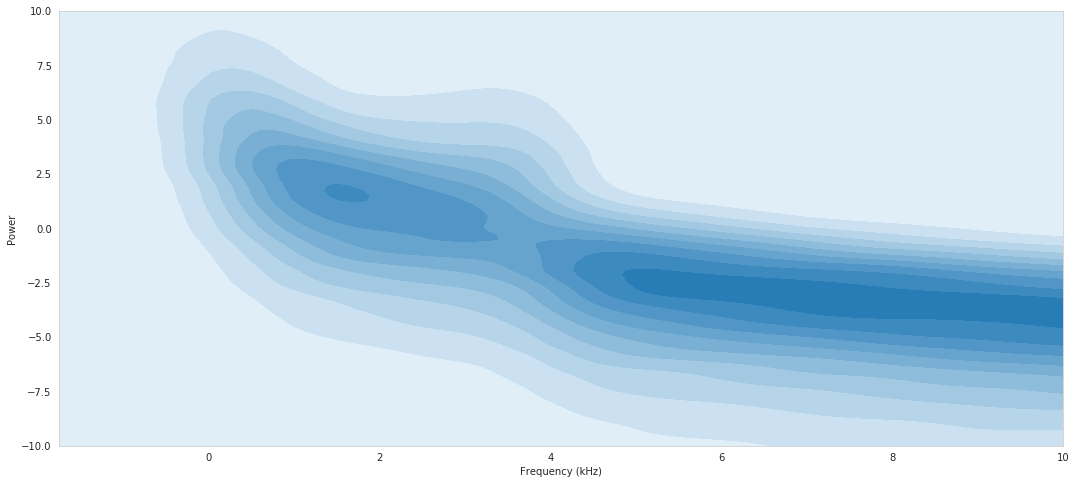

In [37]:
plt.figure(figsize=(18,8))
sns.kdeplot(freqArray/1000, 10*np.log10(fourier), clip=[[-10, 10]]*2, shade=True)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power')

/home/michael/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning:

Casting complex values to real discards the imaginary part



TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

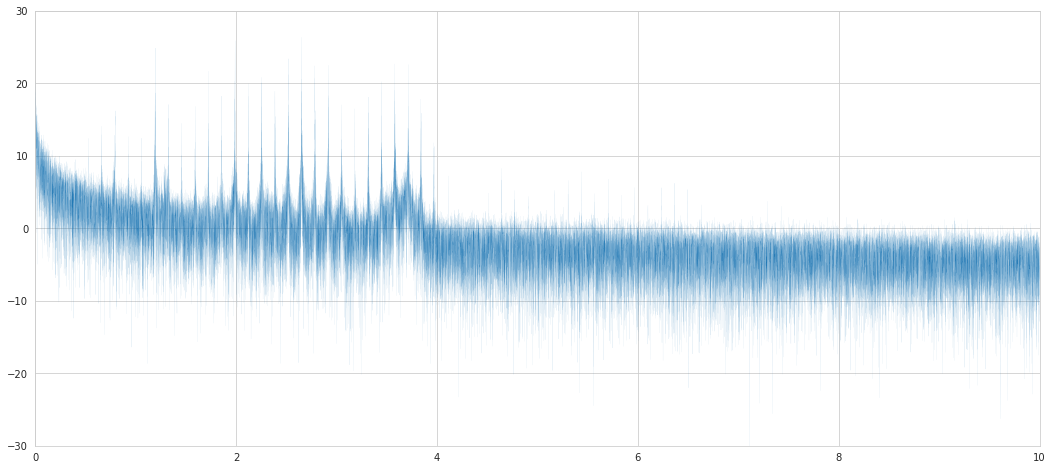

In [38]:
#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (rate*1.0/n);
fig = plt.figure(figsize=(18,8))
plt.ylim(-30, 30)
plt.xlim(0, 10)


ax1 = fig.add_axes(plt.plot(freqArray/1000, 10*np.log10(fourier), linewidth=0.04))
ax2 = fig.add_axes(sns.lineplot(x = df_mean['frequency'], y = df_mean['mean_dBFS'], palette="BuGn", alpha = 1))

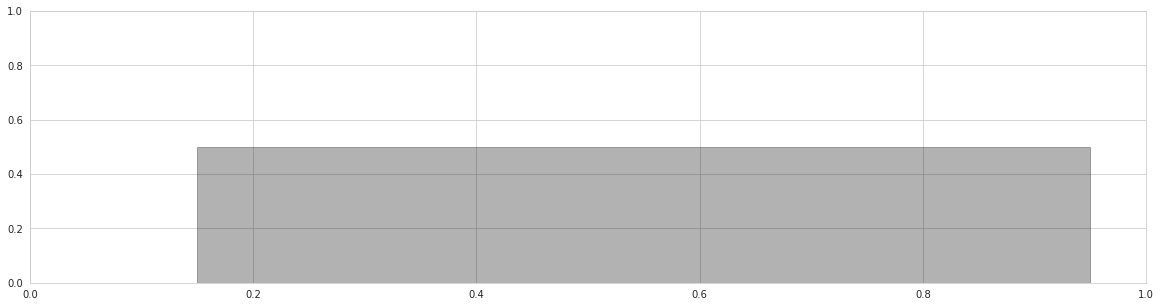

In [62]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.15, 0), 0.8, 0.5, color='k', alpha=0.3)
ax.add_patch(rect)